In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas scikit-learn seaborn matplotlib

In [ ]:
import pandas as pd
# Load into pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/cat disease prediction/dataset/cat_disease_symptoms.csv')
df.head()

,a_dry_coat,abdominal_pain,anorexia,bloody_or_cloudy_urine,change_in_appetite,chronic_or_recurring_infections,decreased_appetite,dehydration,diarrhea,excessive_amounts_of_energy,...,persistent_fever,poor_coat_condition,restlessness,seizures_or_neurological_disorders,"skin,_urinary_or_respiratory_infections",sweet_smelling_breath,various_eye_conditions,vomiting,weight_loss,disease
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,kidney disease
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,diabetes
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,feline immunodeficiency virus (fiv)
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,feline leukemia virus (felv)
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,cancer


In [ ]:
import pandas as pd
import numpy as np

# Load your real dataset
df = pd.read_csv('/content/drive/MyDrive/cat disease prediction/dataset/cat_disease_symptoms.csv')  # or the dataframe you already have

# Separate features and labels
X = df.drop('disease', axis=1)
y = df['disease']

# How much synthetic data you want?
n_samples = 1000  # for example, generate 1000 fake patients

# Prepare empty list to collect synthetic data
synthetic_data = []
synthetic_labels = []

# Random generation
for _ in range(n_samples):
    # Randomly pick a real sample as base
    idx = np.random.randint(0, len(X))
    sample = X.iloc[idx].copy()
    label = y.iloc[idx]

    # Add small noise: flip some symptoms randomly
    for col in X.columns:
        if np.random.rand() < 0.05:  # 5% chance to flip each symptom
            sample[col] = 1 - sample[col]

    # Save synthetic sample
    synthetic_data.append(sample.values)
    synthetic_labels.append(label)

# Convert synthetic data to DataFrame
X_synthetic = pd.DataFrame(synthetic_data, columns=X.columns)
y_synthetic = pd.Series(synthetic_labels, name='disease')

# Combine with real data (optional but better)
X_final = pd.concat([X, X_synthetic], ignore_index=True)
y_final = pd.concat([y, y_synthetic], ignore_index=True)

# Final synthetic dataset
df_final = pd.concat([X_final, y_final], axis=1)

# Save if you want
df_final.to_csv('/content/drive/MyDrive/cat disease prediction/dataset/cat_disease_symptoms_final.csv', index=False)
print("✅ final dataset created and saved!")


✅ final dataset created and saved!


In [ ]:
df_final.head(7)

,a_dry_coat,abdominal_pain,anorexia,bloody_or_cloudy_urine,change_in_appetite,chronic_or_recurring_infections,decreased_appetite,dehydration,diarrhea,excessive_amounts_of_energy,...,persistent_fever,poor_coat_condition,restlessness,seizures_or_neurological_disorders,"skin,_urinary_or_respiratory_infections",sweet_smelling_breath,various_eye_conditions,vomiting,weight_loss,disease
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,kidney disease
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,diabetes
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,feline immunodeficiency virus (fiv)
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,feline leukemia virus (felv)
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,cancer
5,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,pancreatitis
6,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,hyperthyroidism


# EDA

Shape of data: (1007, 29)
Columns: ['a_dry_coat', 'abdominal_pain', 'anorexia', 'bloody_or_cloudy_urine', 'change_in_appetite', 'chronic_or_recurring_infections', 'decreased_appetite', 'dehydration', 'diarrhea', 'excessive_amounts_of_energy', 'fever', 'frequent_urination', 'gingivitis', 'increased_appetite', 'increased_thirst', 'increased_thirst_and/or_urination', 'lethargy', 'loss_of_appetite', 'persistent_diarrhea', 'persistent_fever', 'poor_coat_condition', 'restlessness', 'seizures_or_neurological_disorders', 'skin,_urinary_or_respiratory_infections', 'sweet_smelling_breath', 'various_eye_conditions', 'vomiting', 'weight_loss', 'disease']
Number of unique diseases: 7


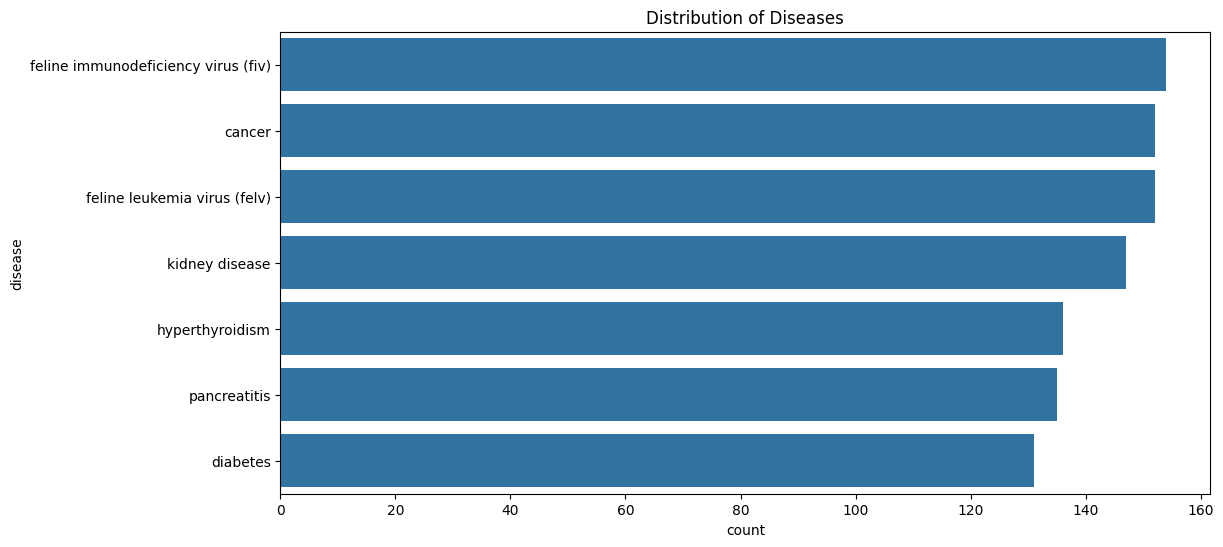

a_dry_coat                                 0
abdominal_pain                             0
anorexia                                   0
bloody_or_cloudy_urine                     0
change_in_appetite                         0
chronic_or_recurring_infections            0
decreased_appetite                         0
dehydration                                0
diarrhea                                   0
excessive_amounts_of_energy                0
fever                                      0
frequent_urination                         0
gingivitis                                 0
increased_appetite                         0
increased_thirst                           0
increased_thirst_and/or_urination          0
lethargy                                   0
loss_of_appetite                           0
persistent_diarrhea                        0
persistent_fever                           0
poor_coat_condition                        0
restlessness                               0
seizures_o

In [ ]:
# Shape of dataset
print("Shape of data:", df_final.shape)

# Column names
print("Columns:", df_final.columns.tolist())

# Number of diseases
print("Number of unique diseases:", df_final['disease'].nunique())

# Disease distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(y='disease', data=df_final, order = df_final['disease'].value_counts().index)
plt.title('Distribution of Diseases')
plt.show()

# Check for missing values
print(df_final.isnull().sum())

# Preprocessing
## Split into X (features) and y (target):

In [ ]:
# Features are all symptoms columns
X = df_final.drop('disease', axis=1)

# Target is the disease
y = df_final['disease']

print(X.shape, y.shape)

(1007, 28) (1007,)


## Split into train and test:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(805, 28) (202, 28)
(805,) (202,)


In [ ]:
print(X_train.head())
print(y_train.head())

     a_dry_coat  abdominal_pain  anorexia  bloody_or_cloudy_urine  \
29            1               0         0                       1   
280           0               0         0                       0   
507           0               0         0                       0   
652           0               0         0                       0   
947           0               0         1                       0   

     change_in_appetite  chronic_or_recurring_infections  decreased_appetite  \
29                    0                                0                   0   
280                   0                                1                   0   
507                   0                                0                   0   
652                   1                                0                   0   
947                   0                                0                   0   

     dehydration  diarrhea  excessive_amounts_of_energy  ...  \
29             0         1              

In [ ]:
# 1. Encode y
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)

y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# 2. Train models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test_encoded, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# 3. Find best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"✅ Best Model: {best_model_name}")

# 4. Retrain best model on full data
X_full = pd.concat([X_train, X_test])
y_full_encoded = le.transform(pd.concat([y_train, y_test]))

best_model.fit(X_full, y_full_encoded)


Random Forest Accuracy: 1.0000
Decision Tree Accuracy: 0.9901
KNN Accuracy: 1.0000
SVM Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000
Gradient Boosting Accuracy: 1.0000
✅ Best Model: Random Forest


RandomForestClassifier(n_estimators=200, random_state=42)

# Build the Machine Learning Model

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))
    print("\n" + "="*40 + "\n")

Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
[[26,  0,  0,  0,  0,  0,  0],
 [ 0, 20,  0,  0,  0,  0,  0],
 [ 0,  0, 29,  0,  0,  0,  0],
 [ 0,  0,  0, 29,  0,  0,  0],
 [ 0,  0,  0,  0, 31,  0,  0],
 [ 0,  0,  0,  0,  0, 32,  0],
 [ 0,  0,  0,  0,  0,  0, 35]]


Decision Tree Accuracy: 0.9900990099009901
Decision Tree Confusion Matrix:
[[26,  0,  0,  0,  0,  0,  0],
 [ 0, 20,  0,  0,  0,  0,  0],
 [ 0,  0, 29,  0,  0,  0,  0],
 [ 0,  0,  0, 29,  0,  0,  0],
 [ 1,  1,  0,  0, 29,  0,  0],
 [ 0,  0,  0,  0,  0, 32,  0],
 [ 0,  0,  0,  0,  0,  0, 35]]


KNN Accuracy: 1.0
KNN Confusion Matrix:
[[26,  0,  0,  0,  0,  0,  0],
 [ 0, 20,  0,  0,  0,  0,  0],
 [ 0,  0, 29,  0,  0,  0,  0],
 [ 0,  0,  0, 29,  0,  0,  0],
 [ 0,  0,  0,  0, 31,  0,  0],
 [ 0,  0,  0,  0,  0, 32,  0],
 [ 0,  0,  0,  0,  0,  0, 35]]


SVM Accuracy: 1.0
SVM Confusion Matrix:
[[26,  0,  0,  0,  0,  0,  0],
 [ 0, 20,  0,  0,  0,  0,  0],
 [ 0,  0, 29,  0,  0,  0,  0],
 [ 0,  0,  0, 29,  0,  0,  0],
 [ 0

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/cat disease prediction/dataset/cat_disease_symptoms_final.csv')

# Count number of 1's for each disease (i.e., for each column)
# Exclude the 'disease' column
positive_counts = df.drop('disease', axis=1).sum()  # Exclude 'disease' column

# Find the disease with maximum positives
max_disease = positive_counts.idxmax()
max_value = positive_counts.max()

# Find the disease with minimum positives
min_disease = positive_counts.idxmin()
min_value = positive_counts.min()

print(f"✅ Disease with MAXIMUM positive cases: {max_disease} ({max_value} cases)")
print(f"✅ Disease with MINIMUM positive cases: {min_disease} ({min_value} cases)")

✅ Disease with MAXIMUM positive cases: weight_loss (700 cases)
✅ Disease with MINIMUM positive cases: lethargy (164 cases)


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/cat disease prediction/dataset/cat_disease_symptoms_final.csv')

# List of all symptom columns
symptom_cols = [col for col in df.columns if col not in ['disease', 'label']]  # adjust if necessary

# Find diseases (assuming 'disease' column contains disease names)
diseases = df['disease'].unique()

# Dictionary to store average number of positive symptoms per disease
avg_symptoms_per_disease = {}

for disease in diseases:
    # Filter rows for this disease (where disease column matches the disease name)
    disease_rows = df[df['disease'] == disease]  # Changed this line

    # For these rows, count number of symptoms per patient
    symptom_counts = disease_rows[symptom_cols].sum(axis=1)

    # Average number of symptoms
    avg_symptoms = symptom_counts.mean()

    avg_symptoms_per_disease[disease] = avg_symptoms

# Find disease needing maximum symptoms
max_disease = max(avg_symptoms_per_disease, key=avg_symptoms_per_disease.get)
max_value = avg_symptoms_per_disease[max_disease]

# Find disease needing minimum symptoms
min_disease = min(avg_symptoms_per_disease, key=avg_symptoms_per_disease.get)
min_value = avg_symptoms_per_disease[min_disease]

print(f"✅ Disease needing MOST symptoms for prediction: {max_disease} ({max_value:.2f} symptoms on average)")
print(f"✅ Disease needing LEAST symptoms for prediction: {min_disease} ({min_value:.2f} symptoms on average)")

✅ Disease needing MOST symptoms for prediction: kidney disease (7.78 symptoms on average)
✅ Disease needing LEAST symptoms for prediction: cancer (4.86 symptoms on average)


In [ ]:
import joblib
joblib.dump(best_model, '/content/drive/MyDrive/cat disease prediction/models/best_model.pkl')
joblib.dump(le, '/content/drive/MyDrive/cat disease prediction/models/label_encoder.pkl')
print("💾 Model and encoder saved!")

💾 Model and encoder saved!


In [ ]:
import pandas as pd
import joblib

# Load the trained model
best_model = joblib.load('/content/drive/MyDrive/cat disease prediction/models/best_model.pkl')

#Load the LabelEncoder if you saved it separately (optional)
le = joblib.load('/content/drive/MyDrive/cat disease prediction/models/label_encoder.pkl')

symptoms = [
    "a_dry_coat", "abdominal_pain", "anorexia", "bloody_or_cloudy_urine",
    "change_in_appetite", "chronic_or_recurring_infections", "decreased_appetite",
    "dehydration", "diarrhea", "excessive_amounts_of_energy", "fever",
    "frequent_urination", "gingivitis", "increased_appetite", "increased_thirst",
    "increased_thirst_and/or_urination", "lethargy", "loss_of_appetite",
    "persistent_diarrhea", "persistent_fever", "poor_coat_condition",
    "restlessness", "seizures_or_neurological_disorders",
    "skin,_urinary_or_respiratory_infections", "sweet_smelling_breath",
    "various_eye_conditions", "vomiting", "weight_loss"
]


# Ask user input
print("👉 Please answer 0 (No) or 1 (Yes) for each symptom:")
input_data = {}

for symptom in symptoms:
    while True:
        val = input(f"Do you have {symptom.replace('_', ' ')}? (0/1): ")
        if val in ['0', '1']:
            input_data[symptom] = int(val)
            break
        else:
            print("⚠️ Please enter only 0 or 1.")

# Convert input to DataFrame
new_X = pd.DataFrame([input_data])

# Make prediction
predicted_class = best_model.predict(new_X)

# If you know mapping (you can print list of classes)
predicted_disease = le.inverse_transform(predicted_class)
print("\n🧠 Predicted Disease:", predicted_disease[0])


👉 Please answer 0 (No) or 1 (Yes) for each symptom:
Do you have a dry coat? (0/1): 0
Do you have abdominal pain? (0/1): 1
Do you have anorexia? (0/1): 0
Do you have bloody or cloudy urine? (0/1): 0
Do you have change in appetite? (0/1): 0
Do you have chronic or recurring infections? (0/1): 1
Do you have decreased appetite? (0/1): 1
Do you have dehydration? (0/1): 0
Do you have diarrhea? (0/1): 0
Do you have excessive amounts of energy? (0/1): 0
Do you have fever? (0/1): 0
Do you have frequent urination? (0/1): 1
Do you have gingivitis? (0/1): 1
Do you have increased appetite? (0/1): 1
Do you have increased thirst? (0/1): 1
Do you have increased thirst and/or urination? (0/1): 0
Do you have lethargy? (0/1): 0
Do you have loss of appetite? (0/1): 0
Do you have persistent diarrhea? (0/1): 0
Do you have persistent fever? (0/1): 0
Do you have poor coat condition? (0/1): 0
Do you have restlessness? (0/1): 0
Do you have seizures or neurological disorders? (0/1): 0
Do you have skin, urinary or